### imports 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [ ]:
tnp.experimental_enable_numpy_behavior()

In [ ]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

### $x \to \hat{y}$ 가 되는 과정을 그림으로 그리기

`-` 단순회귀분석의 예시
- $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, \quad i=1,2,\dots,n$

(표현1)

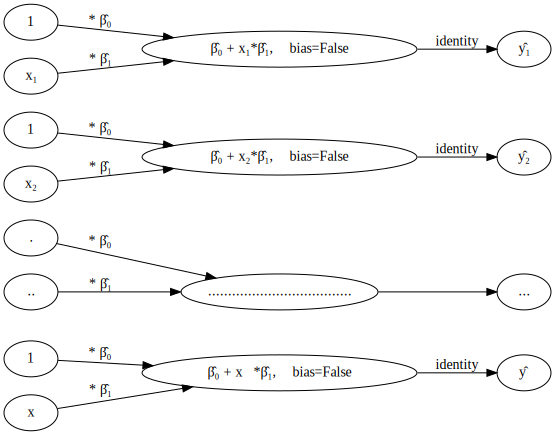

In [ ]:
#collapse-hide
gv(''' 
    "1" -> "β̂₀ + xₙ*β̂₁,    bias=False"[label="* β̂₀"]
    "xₙ" -> "β̂₀ + xₙ*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + xₙ*β̂₁,    bias=False" -> "ŷₙ"[label="identity"]

    "." -> "...................................."[label="* β̂₀"]
    ".." -> "...................................."[label="* β̂₁"]
    "...................................." -> "..."[label=" "]

    "1 " -> "β̂₀ + x₂*β̂₁,    bias=False"[label="* β̂₀"]
    "x₂" -> "β̂₀ + x₂*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x₂*β̂₁,    bias=False" -> "ŷ₂"[label="identity"]
    
    "1  " -> "β̂₀ + x₁*β̂₁,    bias=False"[label="* β̂₀"]
    "x₁" -> "β̂₀ + x₁*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x₁*β̂₁,    bias=False" -> "ŷ₁"[label="identity"]
''')


`-` 표현1의 소감? 
- 교수님이 고생해서 만든것 같음 
- 그런데 그냥 다 똑같은 그림의 반복이라 사실 고생한 의미가 없음. 

(표현2)

`-` 그냥 아래와 같이 그리고 "모든 $i=1,2,3,\dots,n$에 대하여 $\hat{y}_i$을 아래의 그림과 같이 그린다"고 하면 될것 같다. 

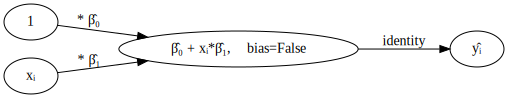

In [ ]:
#collapse-hide
gv(''' 
    "1" -> "β̂₀ + xᵢ*β̂₁,    bias=False"[label="* β̂₀"]
    "xᵢ" -> "β̂₀ + xᵢ*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + xᵢ*β̂₁,    bias=False" -> "ŷᵢ"[label="identity"]

''')


(표현3) 

`-` 그런데 "모든 $i=1,2,3,\dots,n$에 대하여 $\hat{y}_i$을 아래의 그림과 같이 그린다" 라는 언급자체도 반복할 필요가 없을 것 같다. (어차피 당연히 그럴테니까) 그래서 단순히 아래와 같이 그려도 무방할듯 하다. 

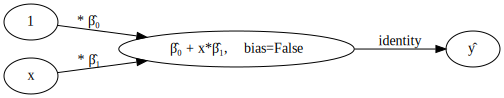

In [ ]:
#collapse-hide
gv(''' 
    "1" -> "β̂₀ + x*β̂₁,    bias=False"[label="* β̂₀"]
    "x" -> "β̂₀ + x*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x*β̂₁,    bias=False" -> "ŷ"[label="identity"]

''')


(표현4)

`-` 위의 모델은 아래와 같이 쓸 수 있다. ($\beta_0$를 바이어스로 표현) 

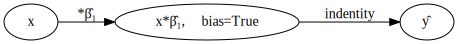

In [ ]:
#collapse-hide
gv('''
"x" -> "x*β̂₁,    bias=True"[label="*β̂₁"] ;
"x*β̂₁,    bias=True" -> "ŷ"[label="indentity"] ''')


- 실제로는 이 표현을 많이 사용함 

(표현5)

`-` 벡터버전으로 표현하면 아래와 같다. 이 경우에는 ${\bf X}=[1,x]$에 포함된 1이 bias의 역할을 해주므로 `bias = False` 임. 

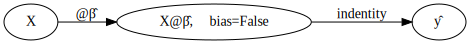

In [ ]:
#collapse-hide
gv('''
"X" -> "X@β̂,    bias=False"[label="@β̂"] ;
"X@β̂,    bias=False" -> "ŷ"[label="indentity"] ''')


- 저는 이걸 좋아해요 

(표현6)

`-` 딥러닝에서는 $\hat{\boldsymbol{\beta}}$ 대신에 $\hat{{\bf W}}$을 라고 표현한다. 

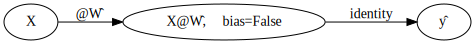

In [ ]:
#collapse-hide
gv('''
"X" -> "X@Ŵ,    bias=False"[label="@Ŵ"] ;
"X@Ŵ,    bias=False" -> "ŷ"[label="identity"] ''')


`-` 실제로는 표현4 혹은 표현5를 외우면 된다. 

### Layer의 개념 

`-` (표현4) 혹은 (표현5)의 그림은 레이어로 설명할 수 있다. 

`-` 레이어는 항상 아래와 같은 규칙을 가진다. 
- 첫 동그라미는 레이어의 입력이다. 
- 첫번째 화살표는 선형변환을 의미한다. 
- 두번째 동그라미는 선형변환의 결과이다. (이때 bias가 false인지 true인지에 따라서 실제 수식이 조금 다름) 
- 두번째 화살표는 두번째 동그라미에 어떠한 함수 $f$를 취하는 과정을 의미한다.
- 세번째 동그라미는 레이어의 최종출력이다. 

`-` 엄청 복잡한데, 결국 레이어를 만들때 위의 그림들을 의미하도록 하려면 아래의 4개의 요소만 필요하다. 
1. 레이어의 입력차원 
2. 선형변환의 결과로 얻어지는 차원
3. 선형변환에서 바이어스를 쓸지? 안쓸지? 
4. 함수 $f$

`-` 주목: 1,2가 결정되면 자동으로 $\hat{{\bf W}}$의 차원이 결정된다. 

(예시)
- 레이어의 입력차원=2, 선형변환의 결과로 얻어지는 차원=1: $\hat{\bf W}$는 (2,1) 매트릭스 
- 레이어의 입력차원=20, 선형변환의 결과로 얻어지는 차원=5: $\hat{\bf W}$는 (20,5) 매트릭스 
- 레이어의 입력차원=2, 선형변환의 결과로 얻어지는 차원=50: $\hat{\bf W}$는 (2,50) 매트릭스 


`-` 주목2: 이중에서 절대 생략불가능 것은 "2. 선형변환의 결과로 얻어지는 차원" 이다. 
- 레이어의 입력차원: 실제 레이어에 데이터가 들어올 때 데이터의 입력차원을 컴퓨터 스스로 체크하여 $\hat{\bf W}$의 차원을 결정할 수 있음. 
- 바이어스를 쓸지? 안쓸지? 기본적으로 쓴다고 가정한다. 
- 함수 $f$: 기본적으로 항등함수를 가정하면 된다. 

### Keras를 이용한 풀이 

`-` 기본뼈대: net생성 $\to$ add(layer) $\to$ compile(opt,loss) $\to$ fit(data,epochs) 

`-` 데이터정리 

$${\bf y}\approx 2.5 +4x$$ 

In [ ]:
tnp.random.seed(43052)
N= 200 
x= tnp.linspace(0,1,N)
epsilon= tnp.random.randn(N)*0.5 
y= 2.5+4*x +epsilon

In [ ]:
X=tf.stack([tf.ones(N,dtype='float64'),x],axis=1)

#### 풀이1: 스칼라버전 

(0단계) 데이터정리 

In [ ]:
y=y.reshape(N,1)
x=x.reshape(N,1)
x.shape,y.shape

(TensorShape([200, 1]), TensorShape([200, 1]))

(1단계) net 생성 

In [ ]:
net = tf.keras.Sequential() 

(2단계) net.add(layer) 

In [ ]:
layer = tf.keras.layers.Dense(1) ## 선형변환의 결과 차원
# 입력차원? 데이터를 넣어보고 결정, 바이어스=디폴드값을 쓰겠음 (use_bias=true), 함수도 디폴트값을 쓰겠음 (f(x)=x)
net.add(layer)

(3단계) net.compile(opt,loss_fn) 

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1), tf.keras.losses.MSE) 

(4단계) net.fit(x,y,epochs)

In [ ]:
net.fit(x,y,epochs=1000,verbose=0,batch_size=N) # batch_size=N 일 경우에 경사하강법이 적용, batch_size!=N 이면 확률적 경사하강법 적용 

(결과확인) 

In [ ]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.9330251]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.5836723], dtype=float32)>]

$${\bf y}\approx 2.5 +4x$$ 

#### 풀이2: 벡터버전  

(0단계) 데이터정리 

In [ ]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net 생성 

In [ ]:
net = tf.keras.Sequential() 

(2단계) net.add(layer) 

In [ ]:
layer = tf.keras.layers.Dense(1,use_bias=False) 
net.add(layer)

(3단계) net.compile(opt,loss_fn) 

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1), tf.keras.losses.MSE) 

(4단계) net.fit(x,y,epochs)

In [ ]:
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) # batch_size=N 일 경우에 경사하강법이 적용, batch_size!=N 이면 확률적 경사하강법 적용 

(결과확인) 

In [ ]:
net.weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5836728],
        [3.9330244]], dtype=float32)>]

#### 잠시문법정리 

`-` 잠깐 Dense layer를 만드는 코드를 정리해보자. 

(1) 아래는 모두 같은 코드이다. 
- tf.keras.layers.Dense(1) 
- tf.keras.layers.Dense(units=1) 
- tf.keras.layers.Dense(units=1,activation='linear') // identity 가 더 맞는것 같은데.. 
- tf.keras.layers.Dense(units=1,activation='linear',use_bias=True) 

(2) 아래의 코드1,2는 (1)의 코드들과 살짝 다른코드이다. (코드1과 코드2는 같은코드임) 
- tf.keras.layers.Dense(1,input_dim=2) # 코드1
- tf.keras.layers.Dense(1,input_shape=(2,)) # 코드2 


(3) 아래는 사용불가능한 코드이다. 
- tf.keras.layers.Dense(1,input_dim=(2,)) # 코드1
- tf.keras.layers.Dense(1,input_shape=2) # 코드2 

`-` 왜 input_dim이 필요한가?

In [ ]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Dense(1,use_bias=False)) 

In [ ]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Dense(1,use_bias=False,input_dim=2))

`-` net1의 경우 `input_dim`을 명시해주지 않아 `Weight`를 알 수 없다

In [ ]:
net1.weights

ValueError: ignored

In [ ]:
net2.weights

[<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.053657 ],
        [ 1.3536845]], dtype=float32)>]

`-` 또한 입력차원을 모르기 깨문에 `summary`값도 알 수 없다.

In [ ]:
net1.summary()

ValueError: ignored

In [ ]:
net2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### 풀이3: 스칼라버전, 임의의 초기값을 설정 

(0단계) 데이터정리 

In [ ]:
y=y.reshape(N,1)
x=x.reshape(N,1)
x.shape,y.shape

(TensorShape([200, 1]), TensorShape([200, 1]))

(1단계) net생성 

In [ ]:
net = tf.keras.Sequential() 

(2단계) net.add(layer)

In [ ]:
layer = tf.keras.layers.Dense(1,input_dim=1)

In [ ]:
net.add(layer)

--- 

***초기값을 설정***

In [ ]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.534932]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
net.get_weights()

[array([[0.534932]], dtype=float32), array([0.], dtype=float32)]

- weight, bias순으로 출력 

In [ ]:
net.set_weights?

-  layer_b.set_weights(layer_a.get_weights()) 와 같은방식으로 쓴다는 것이군? 

`-` 한번따라해보자. 

In [ ]:
_w = net.get_weights()
_w

[array([[0.534932]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
_w[0]

array([[0.534932]], dtype=float32)

- 길이가 2인 리스트이고, 각 원소는 numpy array 임 

In [ ]:
net.set_weights(
    [np.array([[10.0]],dtype=np.float32), # weight, β1_hat
     np.array([-5.0],dtype=np.float32)] # bias, β0_hat 
)

In [ ]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[10.]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-5.], dtype=float32)>]

---

(3단계) net.compile()

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1),tf.losses.MSE) 

(4단계) net.fit()

In [ ]:
net.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

결과확인 

In [ ]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.933048]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([2.58366], dtype=float32)>]

#### 풀이4: 벡터버전, 임의의 초기값을 설정 

(0단계) 데이터정리 

In [ ]:
X.shape, y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net생성 

In [ ]:
net = tf.keras.Sequential()

(2단계) net.add(layer) 

In [ ]:
layer = tf.keras.layers.Dense(1,use_bias=False,input_dim=2) 

In [ ]:
net.add(layer)

---

***초기값을 설정하자***

In [ ]:
net.set_weights([np.array([[ -5.0],[10.0]], dtype=np.float32)])

In [ ]:
net.get_weights()

[array([[-5.],
        [10.]], dtype=float32)]

---

(3단계) net.compile()

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1), tf.losses.MSE) 

(4단계) net.fit()

In [ ]:
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 

In [ ]:
net.weights

[<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.58366 ],
        [3.933048]], dtype=float32)>]

`-` 사실 실전에서는 초기값을 설정할 필요가 별로 없음. 

#### 풀이5: 벡터버전 사용자정의 손실함수 

(0단계) 데이터정리 

In [ ]:
X.shape, y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net생성 

In [ ]:
net = tf.keras.Sequential()

(2단계) net.add(layer) 

In [ ]:
layer = tf.keras.layers.Dense(1,use_bias=False) 

In [ ]:
net.add(layer)

(3단계) net.compile()

In [ ]:
loss_fn = lambda y,yhat: (y-yhat).T @ (y-yhat) / N

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1), loss_fn) 

(4단계) net.fit()

In [ ]:
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 

In [ ]:
net.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5836728],
        [3.9330244]], dtype=float32)>]

#### 풀이6: 벡터버전, net.compile의 옵션으로 손실함수 지정 

(0단계) 데이터정리 

In [ ]:
X.shape, y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net생성 

In [ ]:
net = tf.keras.Sequential()

(2단계) net.add(layer) 

In [ ]:
net.add(tf.keras.layers.Dense(1,use_bias=False))

(3단계) net.compile()

In [ ]:
net.compile(tf.keras.optimizers.SGD(0.1), loss='mse') 

(4단계) net.fit()

In [ ]:
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 

In [ ]:
net.weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5836728],
        [3.9330244]], dtype=float32)>]

#### 풀이7: 벡터버전, net.compile의 옵션으로 손실함수 지정 + 옵티마이저 지정 

(0단계) 데이터정리 

In [ ]:
X.shape, y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net생성 

In [ ]:
net = tf.keras.Sequential()

(2단계) net.add(layer) 

In [ ]:
net.add(tf.keras.layers.Dense(1,use_bias=False))

(3단계) net.compile()

In [ ]:
net.compile(optimizer='sgd', loss='mse') 
#net.optimizer.lr = tf.Variable(0.1,dtype=tf.float32)
#net.optimizer.lr = 0.1

(4단계) net.fit()

In [ ]:
net.fit(X,y,epochs=5000,verbose=0,batch_size=N) 

In [ ]:
net.weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5842712],
        [3.9319096]], dtype=float32)>]

### 여러가지 회귀모형의 적합과 학습과정의 모니터링 

#### 예제1

model: $y_i \approx \beta_0 +\beta_1 x_i$ 

In [ ]:
np.random.seed(43052) 
N= 100 
x= np.random.randn(N) 
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*x +epsilon

In [ ]:
X= np.stack([np.ones(N),x],axis=1)
y= y.reshape(N,1)

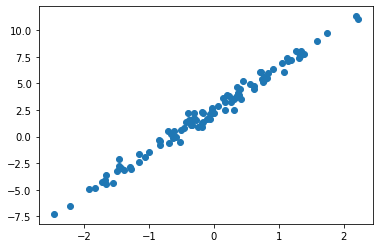

In [ ]:
plt.plot(x,y,'o') # 관측한 자료 

In [ ]:
beta_hat = np.array([-3,-2]).reshape(2,1)

In [ ]:
yhat = X@beta_hat 

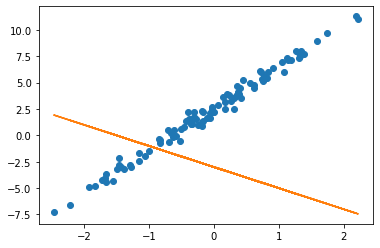

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,yhat.reshape(-1),'-') 

더 좋은 적합선을 얻기위해서!

In [ ]:
slope = (2*X.T@X@beta_hat - 2*X.T@y)/ N 
beta_hat2 = beta_hat - 0.1*slope  
yhat2 = X@beta_hat2

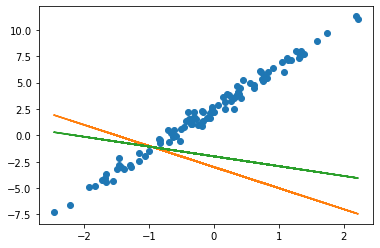

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,yhat.reshape(-1),'-') 
plt.plot(x,yhat2.reshape(-1),'-') 

초록색이 좀 더 나아보인다. 

In [ ]:
beta_hat = np.array([-3,-2]).reshape(2,1) 
beta_hats = beta_hat # beta_hats = beta_hat.copy() 가 더 안전한 코드입니다. 
for i in range(1,30):
    yhat = X@beta_hat 
    slope = (2*X.T@X@beta_hat - 2*X.T@y) / N 
    beta_hat = beta_hat - 1.0*slope # 0.1은 적당, 0.3은 쪼금빠르지만 그래도 적당, 0.9는 너무 나간것같음, 1.0 은 수렴안함, 1.2 
    beta_hats = np.concatenate([beta_hats,beta_hat],axis=1) 

In [ ]:
beta_hats

array([[-3.        ,  7.12238255, -1.2575366 ,  5.73166742, -0.1555309 ,
         4.86767499,  0.51106397,  4.36611576,  0.87316777,  4.12348617,
         1.01165173,  4.07771926,  0.97282343,  4.19586617,  0.77814101,
         4.46653491,  0.4299822 ,  4.89562729, -0.08537358,  5.50446319,
        -0.79684366,  6.32975688, -1.74933031,  7.42517729, -3.00603683,
         8.86442507, -4.6523303 , 10.74592463, -6.80132547, 13.19938129],
       [-2.        ,  8.70824998,  0.16165717,  6.93399596,  1.62435964,
         5.72089586,  2.63858056,  4.86387722,  3.37280529,  4.22385379,
         3.94259478,  3.70397678,  4.43004465,  3.23363047,  4.89701606,
         2.75741782,  5.39439054,  2.22728903,  5.96886945,  1.59655409,
         6.66836857,  0.81489407,  7.54676324, -0.17628423,  8.66856437,
        -1.44867655, 10.11401544, -3.09256176, 11.98507323, -5.22340389]])

In [ ]:
b0hats = beta_hats[0].tolist()
b1hats = beta_hats[1].tolist()

In [ ]:
np.linalg.inv(X.T@X) @ X.T @ y

array([[2.5451404 ],
       [3.94818596]])

In [ ]:
from matplotlib import animation 
plt.rcParams["animation.html"] = "jshtml" 

In [ ]:
fig = plt.figure(); fig.set_figheight(5); fig.set_figwidth(12)

<Figure size 864x360 with 0 Axes>

In [ ]:
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2,projection='3d')
# ax1: 왼쪽그림 
ax1.plot(x,y,'o')
line, = ax1.plot(x,b0hats[0] + b1hats[0]*x) 
# ax2: 오른쪽그림 
β0,β1 = np.meshgrid(np.arange(-6,11,0.25),np.arange(-6,11,0.25),indexing='ij')
β0=β0.reshape(-1)
β1=β1.reshape(-1)
loss_fn = lambda b0,b1: np.sum((y-b0-b1*x)**2)
loss = list(map(loss_fn, β0,β1))
ax2.scatter(β0,β1,loss,alpha=0.02) 
ax2.scatter(2.5451404,3.94818596,loss_fn(2.5451404,3.94818596),s=200,marker='*') 

def animate(i):
    line.set_ydata(b0hats[i] + b1hats[i]*x) 
    ax2.scatter(b0hats[i],b1hats[i],loss_fn(b0hats[i],b1hats[i]),color="grey") 

ani = animation.FuncAnimation(fig,animate,frames=30) 
ani

Output hidden; open in https://colab.research.google.com to view.

#### 예제2

model: $y_i \approx \beta_0 +\beta_1 e^{-x_i}$ 

In [ ]:
np.random.seed(43052) 
N= 100 
x= np.linspace(-1,1,N)
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*np.exp(-x) +epsilon

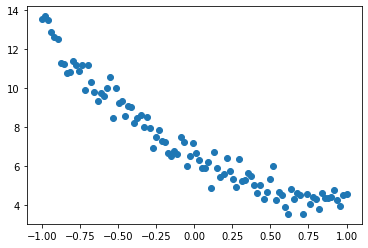

In [ ]:
plt.plot(x,y,'o')

In [ ]:
X= np.stack([np.ones(N),np.exp(-x)],axis=1)
y= y.reshape(N,1)

In [ ]:
beta_hat = np.array([-3,-2]).reshape(2,1)
beta_hats = beta_hat.copy() # shallow copy, deep copy <--- 여름 방학 특강 
for i in range(1,30): 
    yhat = X@beta_hat 
    slope = (2*X.T@X@beta_hat - 2*X.T@y) /N 
    beta_hat = beta_hat - 0.05*slope 
    beta_hats = np.concatenate([beta_hats,beta_hat],axis=1) 

In [ ]:
beta_hats

array([[-3.        , -1.74671631, -0.82428979, -0.14453919,  0.35720029,
         0.72834869,  1.0036803 ,  1.20869624,  1.36209751,  1.47759851,
         1.56525696,  1.63244908,  1.68458472,  1.72563174,  1.75850062,
         1.78532638,  1.80767543,  1.82669717,  1.84323521,  1.85790889,
         1.8711731 ,  1.88336212,  1.89472176,  1.90543297,  1.91562909,
         1.92540859,  1.93484428,  1.94399023,  1.9528867 ,  1.96156382],
       [-2.        , -0.25663415,  1.01939241,  1.95275596,  2.63488171,
         3.13281171,  3.49570765,  3.75961951,  3.95098231,  4.08918044,
         4.18842797,  4.2591476 ,  4.30898175,  4.34353413,  4.36691339,
         4.38213187,  4.39139801,  4.39633075,  4.39811673,  4.3976256 ,
         4.3954946 ,  4.3921905 ,  4.38805511,  4.3833386 ,  4.37822393,
         4.37284482,  4.36729887,  4.36165718,  4.35597148,  4.35027923]])

In [ ]:
b0hats= beta_hats[0].tolist()
b1hats= beta_hats[1].tolist()

In [ ]:
np.linalg.inv(X.T@X)@X.T@y

array([[2.46307644],
       [3.99681332]])

In [ ]:
fig = plt.figure(); fig.set_figheight(5); fig.set_figwidth(12)

<Figure size 864x360 with 0 Axes>

In [ ]:
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2,projection='3d')
# ax1: 왼쪽그림 
ax1.plot(x,y,'o')
line, = ax1.plot(x,b0hats[0] + b1hats[0]*np.exp(-x))
# ax2: 오른쪽그림 
β0,β1 = np.meshgrid(np.arange(-6,11,0.25),np.arange(-6,11,0.25),indexing='ij')
β0=β0.reshape(-1)
β1=β1.reshape(-1)
loss_fn = lambda b0,b1: np.sum((y-b0-b1*np.exp(-x))**2)
loss = list(map(loss_fn, β0,β1))
ax2.scatter(β0,β1,loss,alpha=0.02) 
ax2.scatter(2.46307644,3.99681332,loss_fn(2.46307644,3.99681332),s=200,marker='*') 

def animate(i):
    line.set_ydata(b0hats[i] + b1hats[i]*np.exp(-x))
    ax2.scatter(b0hats[i],b1hats[i],loss_fn(b0hats[i],b1hats[i]),color="grey") 

ani = animation.FuncAnimation(fig,animate,frames=30) 
ani

Output hidden; open in https://colab.research.google.com to view.

#### 예제3

model: $y_i \approx \beta_0 +\beta_1 e^{-x_i} + \beta_2 \cos(5x_i)$ 

In [ ]:
np.random.seed(43052) 
N= 100 
x= np.linspace(-1,1,N)
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*np.exp(-x) + 5*np.cos(5*x) + epsilon

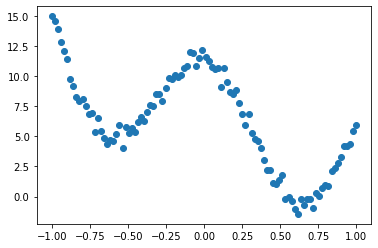

In [ ]:
plt.plot(x,y,'o')

In [ ]:
X=np.stack([np.ones(N),np.exp(-x),np.cos(5*x)],axis=1) 
y=y.reshape(N,1)

In [ ]:
beta_hat = np.array([-3,-2,-1]).reshape(3,1) 
beta_hats = beta_hat.copy()
for i in range(1,30):
    yhat = X@beta_hat 
    slope = (2*X.T@X@beta_hat -2*X.T@y) /N 
    beta_hat = beta_hat - 0.1 * slope 
    beta_hats= np.concatenate([beta_hats,beta_hat],axis=1)

In [ ]:
beta_hats

array([[-3.        , -0.71767532,  0.36255782,  0.89072137,  1.16423101,
         1.31925078,  1.41819551,  1.48974454,  1.54713983,  1.59655416,
         1.64091846,  1.68167278,  1.71956758,  1.75503084,  1.78833646,
         1.81968188,  1.84922398,  1.877096  ,  1.90341567,  1.92828934,
         1.95181415,  1.97407943,  1.99516755,  2.01515463,  2.0341111 ,
         2.05210214,  2.06918818,  2.08542523,  2.10086524,  2.11555643],
       [-2.        ,  1.16947474,  2.64116513,  3.33411605,  3.66880042,
         3.83768856,  3.92897389,  3.98315095,  4.01888831,  4.04486085,
         4.06516144,  4.08177665,  4.09571971,  4.10754954,  4.1176088 ,
         4.12613352,  4.13330391,  4.13926816,  4.14415391,  4.14807403,
         4.15112966,  4.1534121 ,  4.15500404,  4.15598045,  4.15640936,
         4.15635249,  4.15586584,  4.15500014,  4.15380139,  4.1523112 ],
       [-1.        , -0.95492718, -0.66119313, -0.27681968,  0.12788212,
         0.52254445,  0.89491388,  1.24088224,  1

In [ ]:
b0hats,b1hats,b2hats = beta_hats

In [ ]:
np.linalg.inv(X.T@X) @ X.T @ y

array([[2.46597526],
       [4.00095138],
       [5.04161877]])

In [ ]:
fig = plt.figure(); fig.set_figheight(5); fig.set_figwidth(12)

<Figure size 864x360 with 0 Axes>

In [ ]:
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2,projection='3d')
# ax1: 왼쪽그림 
ax1.plot(x,y,'o')
line, = ax1.plot(x,b0hats[0] + b1hats[0]*np.exp(-x) + b2hats[0]*np.cos(5*x))
# ax2: 오른쪽그림 
# β0,β1 = np.meshgrid(np.arange(-6,11,0.25),np.arange(-6,11,0.25),indexing='ij')
# β0=β0.reshape(-1)
# β1=β1.reshape(-1)
# loss_fn = lambda b0,b1: np.sum((y-b0-b1*np.exp(-x))**2)
# loss = list(map(loss_fn, β0,β1))
# ax2.scatter(β0,β1,loss,alpha=0.02) 
# ax2.scatter(2.46307644,3.99681332,loss_fn(2.46307644,3.99681332),s=200,marker='*') 

def animate(i):
    line.set_ydata(b0hats[i] + b1hats[i]*np.exp(-x) + b2hats[i]*np.cos(5*x))
    # ax2.scatter(b0hats[i],b1hats[i],loss_fn(b0hats[i],b1hats[i]),color="grey") 

ani = animation.FuncAnimation(fig,animate,frames=30) 
ani

Output hidden; open in https://colab.research.google.com to view.

#### 예제3: 케라스로 해보자!

model: $y_i \approx \beta_0 +\beta_1 e^{-x_i} + \beta_2 \cos(5x_i)$ 

In [ ]:
np.random.seed(43052) 
N= 100 
x= np.linspace(-1,1,N)
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*np.exp(-x) + 5*np.cos(5*x) + epsilon

In [ ]:
X=np.stack([np.ones(N),np.exp(-x),np.cos(5*x)],axis=1) 
y=y.reshape(N,1)

In [ ]:
net = tf.keras.Sequential() # 1: 네트워크 생성
net.add(tf.keras.layers.Dense(1,use_bias=False)) # 2: add layer 
net.compile(tf.optimizers.SGD(0.1), loss='mse') # 3: compile
net.fit(X,y,epochs=30, batch_size=N) # 4: fit 

Epoch 1/30
1/1 [==============================] - 0s 186ms/step - loss: 82.1027
Epoch 2/30
1/1 [==============================] - 0s 11ms/step - loss: 23.9512
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 10.7256
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 7.0664
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 5.5521
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 4.6075
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 3.8836
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 3.2909
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 2.7971
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 2.3838
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 2.0374
Epoch 12/30
1/1 [==============================] - 0s 5ms/step - loss: 1.7471
Epoch 13/30
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
net.weights

[<tf.Variable 'dense_9/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[2.485702 ],
        [3.9252913],
        [4.6923084]], dtype=float32)>]

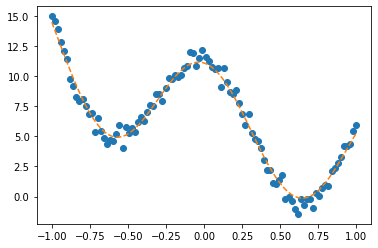

In [ ]:
plt.plot(x,y,'o') 
plt.plot(x,(X@net.weights).reshape(-1),'--')

### 숙제

#### 예제2: 케라스를 이용하여 아래를 만족하는 적절한 $\beta_0$와 $\beta_1$을 구하라. 적합결과를 시각화하라. (애니메이션 시각화 X) 

model: $y_i \approx \beta_0 +\beta_1 e^{-x_i}$ 

In [ ]:
np.random.seed(43052) 
N= 100 
x= np.linspace(-1,1,N)
epsilon = np.random.randn(N)*0.5 
y= 2.5+4*np.exp(-x) +epsilon